<a href="https://colab.research.google.com/github/tareing/20240202test/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EA%B8%B0%EC%B4%88_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 관련 라이브러리 로드
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
# 학습용 데이터와 테스트용 데이터 준비
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# 데이터의 개수 및 내용 확인
print(train_images.shape)
print(train_labels.shape)
print(train_labels)


(60000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]


In [5]:
# 각 레이블의 클래스명을 찾기 위한 배열 생성
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# 레이블 3은 Dress임을 확인
class_names[3]

'Dress'

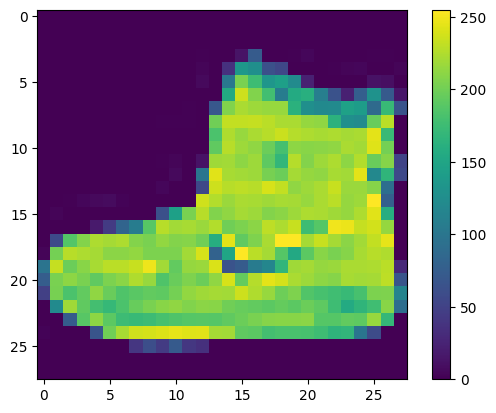

In [7]:
# train_images의 첫번째 데이터를 직접 이미지로 출력하기
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

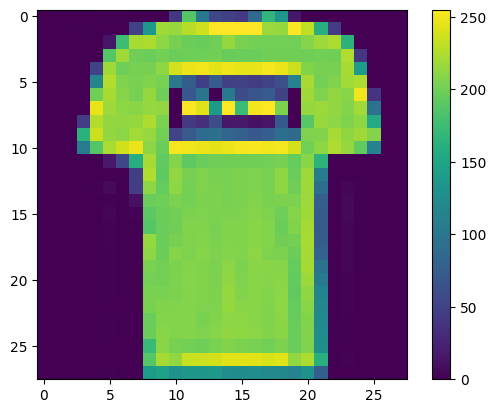

In [8]:
# train_images의 두번째 데이터를 직접 이미지로 출력하기
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 문제1.
# 학습 속도와 성능을 높이기 위해 정규화 하기

In [10]:
# 문제2.
# 다음과 같은 층으로 구성된 모델을 구성해주세요.
# 입력층((28, 28))
# 은닉층 - 300개, 활성함수 relu
# 출력층(10)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 입력층
    tf.keras.layers.Dense(300, activation='relu'),   # 은닉층
    tf.keras.layers.Dense(10)                        # 출력층
])


In [11]:
# 모델 세부 정보 세팅
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# 문제3.
# 데이터를 이용해 모델 학습시키기(epochs는 5회)


train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 입력층
    tf.keras.layers.Dense(300, activation='relu'),   # 은닉층
    tf.keras.layers.Dense(10)                        # 출력층
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4789 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3643 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3256 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2999 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2845 - accuracy: 0.8946


In [14]:
# 학습된 모델의 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3700 - accuracy: 0.8679 - 1s/epoch - 3ms/step

Test accuracy: 0.867900013923645


In [15]:
# 학습된 모델의 결과를 확률로 볼수 있도록 설정
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [16]:
# 표기법을 보기 쉽게 소수점 표기법으로 바꿈
import numpy as np

 # 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)

predictions

array([[0.000025, 0.      , 0.      , ..., 0.035333, 0.000003, 0.964606],
       [0.000152, 0.      , 0.992749, ..., 0.      , 0.      , 0.      ],
       [0.000008, 0.999989, 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.00059 , 0.      , 0.00016 , ..., 0.      , 0.998419, 0.      ],
       [0.000002, 0.999374, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.011614, 0.000032, 0.000535, ..., 0.296057, 0.041093, 0.004735]],
      dtype=float32)

In [17]:
# 예측 결과 10개중 가장 높은 확률의 레이블을 뽑는 법
np.argmax(predictions[0])

9

In [18]:
# 문제4.
# 테스트 데이터의 0번째 이미지를 모델에게 예측하게 하여 그 결과를 출력해주세요.
test_image = np.expand_dims(test_images[0], axis=0)  # 배치 차원 추가


predictions = model.predict(test_image)


predicted_label = np.argmax(predictions)
print("모델이 예측한 레이블:", predicted_label)

1/1 [==============================] - 0s 112ms/step
모델이 예측한 레이블: 9


In [19]:
# 문제5.
# 테스트 데이터의 100번째 이미지를 모델에게 예측하게 하여 그 결과를 출력해주세요.
test_image_100 = np.expand_dims(test_images[100], axis=0)

predictions_100 = model.predict(test_image_100)

predicted_label_100 = np.argmax(predictions_100)
print("모델이 예측한 레이블:", predicted_label_100)

1/1 [==============================] - 0s 108ms/step
모델이 예측한 레이블: 3
